<a href="https://colab.research.google.com/github/abhijith789/British-airways-review-analysis/blob/main/BA_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [6]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [7]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I booked through BA becaus...
1,✅ Trip Verified | British airways lost bags ...
2,✅ Trip Verified | The check in process and rew...
3,"✅ Trip Verified | We flew in November 2023, ..."
4,✅ Trip Verified | I left for London from Johan...


In [8]:
df.describe()

,reviews
count,1000
unique,1000
top,✅ Trip Verified | I booked through BA becaus...
freq,1


# **Reading the Dataset**

In [9]:
df = pd.read_csv('/content/BA_reviews.csv')
print(df.head())

   Unnamed: 0                                            reviews
0           0  ✅ Trip Verified |   I booked through BA becaus...
1           1  ✅ Trip Verified |   British airways lost bags ...
2           2  ✅ Trip Verified | The check in process and rew...
3           3  ✅ Trip Verified |   We flew in November 2023, ...
4           4  ✅ Trip Verified | I left for London from Johan...


In [10]:
df.describe()

,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [11]:
df.tail()

,Unnamed: 0,reviews
995,995,✅ Trip Verified | My flight was cancelled 3 da...
996,996,✅ Trip Verified | Hong Kong to Copenhagen via...
997,997,✅ Trip Verified | London Gatwick to San Jose C...
998,998,Not Verified | Inflight crew were very helpfu...
999,999,✅ Trip Verified | From Toronto to Pisa British...


In [13]:
df.shape

(1000, 2)

# **1. Data cleaning**

In [12]:
# Function to remove text before '|'
def clean_text(text):
    if isinstance(text, str) and '|' in text:
        return text.split('|', 1)[1].strip()  # Split at the first '|', keep the part after, and remove leading/trailing whitespace
    else:
        return text  # Return the original text if '|' is not found or the text is not a string

# Apply the function to the 'reviews' column
df['reviews'] = df['reviews'].apply(clean_text)

In [14]:
df.head()

,Unnamed: 0,reviews
0,0,I booked through BA because Loganair don’t hav...
1,1,British airways lost bags in LHR then found th...
2,2,The check in process and reward/loyalty progra...
3,3,"We flew in November 2023, but it took this lon..."
4,4,I left for London from Johannesburg at 21:15 o...


****

# **2. Performing Tokenization**

In [15]:
# Installing dependecies for tokenization
!pip install nltk pandas

In [16]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [17]:
# Download tokenizer data
nltk.download('punkt_tab')

# Word tokenization example
word_tokens = [word_tokenize(review) for review in df['reviews']]

# Sentence tokenization example
sentence_tokens = [sent_tokenize(review) for review in df['reviews']]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [39]:
df.head()

,Unnamed: 0,reviews
0,0,I booked through BA because Loganair don’t hav...
1,1,British airways lost bags in LHR then found th...
2,2,The check in process and reward/loyalty progra...
3,3,"We flew in November 2023, but it took this lon..."
4,4,I left for London from Johannesburg at 21:15 o...


# **3. Remove Stopwords and Punctuation To clean the tokens**

In [37]:
import string
from nltk.corpus import stopwords
nltk.download('stopwords')  # Download stopwords
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

# Remove stopwords and punctuation
cleaned_tokens = [
    [word.lower() for word in word_list if word.lower() not in stop_words and word not in punctuations]
    for word_list in word_tokens
]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [40]:
df['cleaned_reviews'] = cleaned_tokens

In [41]:
df['cleaned_reviews'] = df['cleaned_reviews'].apply(lambda x: ' '.join(x))

In [43]:
df.head()

,Unnamed: 0,reviews,cleaned_reviews
0,0,I booked through BA because Loganair don’t hav...,booked ba loganair ’ representatives mancheste...
1,1,British airways lost bags in LHR then found th...,british airways lost bags lhr found sent colog...
2,2,The check in process and reward/loyalty progra...,check process reward/loyalty program mess neve...
3,3,"We flew in November 2023, but it took this lon...",flew november 2023 took long seek satisfactory...
4,4,I left for London from Johannesburg at 21:15 o...,left london johannesburg 21:15 22 december 202...


# **4. Perform POS Tagging**
- Preserve the context of the word and is essential for Lemmatization

In [66]:
df['pos_tags'] = df['cleaned_reviews'].apply(lambda text: nltk.pos_tag(nltk.word_tokenize(text)))

In [67]:
df.head()

,Unnamed: 0,reviews,cleaned_reviews,pos_tags,lemmatized_tokens,lemma,sentiment
0,0,I booked through BA because Loganair don’t hav...,booked ba loganair ’ representatives mancheste...,"[(booked, VBN), (ba, NN), (loganair, NN), (’, ...","[book, ba, loganair, ’, representative, manche...",book ba loganair ’ representative manchester a...,positive
1,1,British airways lost bags in LHR then found th...,british airways lost bags lhr found sent colog...,"[(british, JJ), (airways, NNS), (lost, VBD), (...","[british, airway, lose, bag, lhr, find, send, ...",british airway lose bag lhr find send cologne ...,negative
2,2,The check in process and reward/loyalty progra...,check process reward/loyalty program mess neve...,"[(check, NN), (process, NN), (reward/loyalty, ...","[check, process, reward/loyalty, program, mess...",check process reward/loyalty program mess neve...,negative
3,3,"We flew in November 2023, but it took this lon...",flew november 2023 took long seek satisfactory...,"[(flew, NNS), (november, JJ), (2023, CD), (too...","[flew, november, 2023, take, long, seek, satis...",flew november 2023 take long seek satisfactory...,positive
4,4,I left for London from Johannesburg at 21:15 o...,left london johannesburg 21:15 22 december 202...,"[(left, JJ), (london, NN), (johannesburg, NN),...","[left, london, johannesburg, 21:15, 22, decemb...",left london johannesburg 21:15 22 december 202...,positive


# **5. Lemmatizing**
- Gives meaningful root words
- Requires POS tags of the words

In [52]:
# Install and import necessary libraries

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [55]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if not found

In [56]:
# Initialize Lemmatizer

lemmatizer = WordNetLemmatizer()

In [57]:
df['lemmatized_tokens'] = df['pos_tags'].apply(lambda x: [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in x])
df['lemma'] = df['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))

In [59]:
df.head()

,Unnamed: 0,reviews,cleaned_reviews,pos_tags,lemmatized_tokens,lemma
0,0,I booked through BA because Loganair don’t hav...,booked ba loganair ’ representatives mancheste...,"[(booked, VBN), (ba, NN), (loganair, NN), (’, ...","[book, ba, loganair, ’, representative, manche...",book ba loganair ’ representative manchester a...
1,1,British airways lost bags in LHR then found th...,british airways lost bags lhr found sent colog...,"[(british, JJ), (airways, NNS), (lost, VBD), (...","[british, airway, lose, bag, lhr, find, send, ...",british airway lose bag lhr find send cologne ...
2,2,The check in process and reward/loyalty progra...,check process reward/loyalty program mess neve...,"[(check, NN), (process, NN), (reward/loyalty, ...","[check, process, reward/loyalty, program, mess...",check process reward/loyalty program mess neve...
3,3,"We flew in November 2023, but it took this lon...",flew november 2023 took long seek satisfactory...,"[(flew, NNS), (november, JJ), (2023, CD), (too...","[flew, november, 2023, take, long, seek, satis...",flew november 2023 take long seek satisfactory...
4,4,I left for London from Johannesburg at 21:15 o...,left london johannesburg 21:15 22 december 202...,"[(left, JJ), (london, NN), (johannesburg, NN),...","[left, london, johannesburg, 21:15, 22, decemb...",left london johannesburg 21:15 22 december 202...


# **6. Perform Sentiment Analysis using TextBlob**

In [60]:
!pip install textblob

In [72]:
from textblob import TextBlob

def get_sentiment(text):
  analysis = TextBlob(text)
  # Classify sentiment as positive, negative, or neutral
  if analysis.sentiment.polarity > 0:
    return 'Positive'
  elif analysis.sentiment.polarity < 0:
    return 'Negative'
  else:
    return 'Neutral'

**Apply the function to the 'lemma' column**

In [73]:
df['sentiment'] = df['lemma'].apply(get_sentiment)

In [74]:
df.head()

,Unnamed: 0,reviews,cleaned_reviews,pos_tags,lemmatized_tokens,lemma,sentiment
0,0,I booked through BA because Loganair don’t hav...,booked ba loganair ’ representatives mancheste...,"[(booked, VBN), (ba, NN), (loganair, NN), (’, ...","[book, ba, loganair, ’, representative, manche...",book ba loganair ’ representative manchester a...,Positive
1,1,British airways lost bags in LHR then found th...,british airways lost bags lhr found sent colog...,"[(british, JJ), (airways, NNS), (lost, VBD), (...","[british, airway, lose, bag, lhr, find, send, ...",british airway lose bag lhr find send cologne ...,Negative
2,2,The check in process and reward/loyalty progra...,check process reward/loyalty program mess neve...,"[(check, NN), (process, NN), (reward/loyalty, ...","[check, process, reward/loyalty, program, mess...",check process reward/loyalty program mess neve...,Negative
3,3,"We flew in November 2023, but it took this lon...",flew november 2023 took long seek satisfactory...,"[(flew, NNS), (november, JJ), (2023, CD), (too...","[flew, november, 2023, take, long, seek, satis...",flew november 2023 take long seek satisfactory...,Positive
4,4,I left for London from Johannesburg at 21:15 o...,left london johannesburg 21:15 22 december 202...,"[(left, JJ), (london, NN), (johannesburg, NN),...","[left, london, johannesburg, 21:15, 22, decemb...",left london johannesburg 21:15 22 december 202...,Positive


In [75]:
df['sentiment'].value_counts()

,count
sentiment,
Positive,660
Negative,323
Neutral,17


# **8. Visualizing Insights**

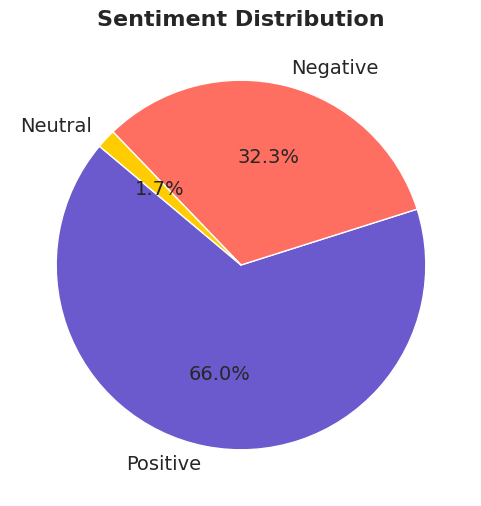

In [77]:
# Import Dependencies
import matplotlib.pyplot as plt

# Count occurrences of each category
sentiment_counts = df['sentiment'].value_counts()

# Define colors for the categories
colors = ['#6a5acd', '#ff6f61', '#ffcc00']  # Purple, Salmon, Yellow

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%',
        startangle=140, textprops={'fontsize': 14}, wedgeprops={'edgecolor': 'white'})

# Add a title
plt.title('Sentiment Distribution', fontsize=16, fontweight='bold')

# Display the chart
plt.show()